# [ Scikit-Learn ] 
- 다양한 머신러닝 알고리즘을 구현한 Python Library
- 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공




In [3]:
pip install scikit-learn

     ---------------------------------------- 8.2/8.2 MB 29.2 MB/s eta 0:00:00
     --------------------------------------- 40.1/40.1 MB 28.4 MB/s eta 0:00:00
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn # 현재 1.2 버전

#### sklearn.datasets 모듈 : 내장된 예제 데이터 세트
- 대표적인 sample dataset들을 제공하고 손쉽게 다운로드 및 로딩
- 데이터별로 적합한 regression/classification 표기

<img src="https://user-images.githubusercontent.com/119478998/208361190-615a6a34-e25b-4dd3-8882-340199c08c78.png" />

- [참고 : 공식 Document](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [13]:
import sklearn.datasets

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use(['seaborn-whitegrid']) # 테마

C:\Users\student\AppData\Local\Temp\ipykernel_7480\1449472512.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid']) # 테마


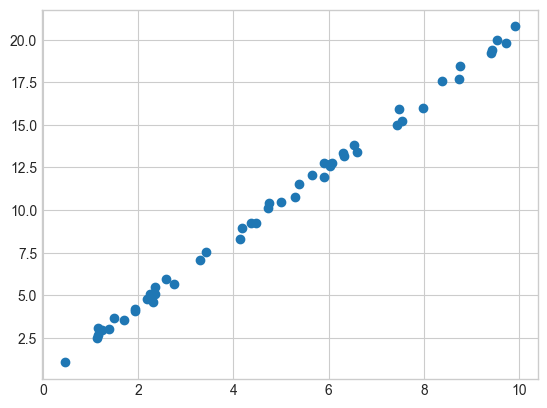

In [7]:
x = 10 * np.random.rand(50) # 정규분포에서 난수 생성 후 10 곱하기 
y = 2 * x + np.random.rand(50) # x애 2를 곱하고 난수 더해주기(noise)
plt.scatter(x, y)

## 머신러닝 모델링 과정
1. 데이터 전처리 : 불필요한 column 을 제거, 데이터를 변환, nan을 제거 또는 대치
2. 데이터 셋 분리 :  학습데이터, 검증데이터
3. 모델 생성 및 학습
    - sklearn api -> model 객체 생
    - model.fit( )
4. 예측 수행 : model.predict(data) -> 예측값
5. 평가 : 실제모델이 어느정도의 성능을 갖고있는가 측정

### Exercise) 선형 회귀
- 선형회귀는 가장 간단한 지도 학습 알고리즘 중 하나

In [8]:
from sklearn.linear_model import LinearRegression 

# model 객체 생성, model의 하이퍼 파라미터 선택
model = LinearRegression(fit_intercept=True)
model?

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\student\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
   

In [9]:
# 학습시킬 dataset shape 확인
print(x.shape)

# X의 shape이 vector 형태가 아니므로 vector로 변경
X = x.reshape((50,1))

print(X.shape)

(50,)
(50, 1)


In [10]:
y.shape

(50,)

In [11]:
# model 학습
model.fit(X, y) # 지도학습이므로 data와 정답을 함께 입력

LinearRegression()

In [12]:
model.coef_ # 회귀계수 (기울기)

array([1.99616187])

In [14]:
model.intercept_ # y 절편의 값

0.522957653444907

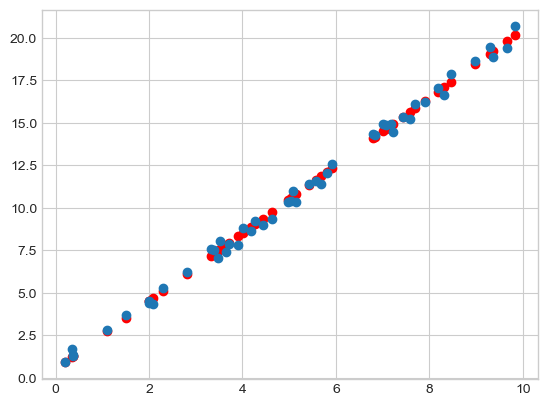

In [18]:
# 학습된 model에 학습시킨 데이터를 다시 넣어 확인
y_predict = model.predict(X)

plt.scatter(x, y_predict, c="r")
plt.scatter(x, y)

---

### Exercise) 유방암 데이터를 이용한 분류 모델

In [5]:
from sklearn.datasets import load_breast_cancer
load_breast_cancer?

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://goo.gl/U2Uwz2

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriate dtypes (numeri

In [8]:
breast_cancer = load_breast_cancer() # dataset load
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
breast_cancer.target # Label Data(Target Data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# 총 569개의 데이터, 30개의 특징
# 이미 vector 
print(breast_cancer.data.shape, "\n")

# 총 569개의 Label Data
print(breast_cancer.target.shape, "\n")

# 30개의 특징에 대한 feature의 정보
print(breast_cancer.feature_names)

(569, 30) 

(569,) 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
import pandas as pd
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
print(data.shape, "\n")
print(data.nunique()) #  총 고유값들의 수

# print(data.isnull().sum())

(569, 30) 

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64
mean radius                0
mean texture    

In [22]:
data["target"] = breast_cancer.target # target (label) 값 지정

In [24]:
# 0과 1로 존재
data["target"].nunique()
set(data["target"]) # 중복을 없앰

{0, 1}

In [28]:
data["target"].mean() # target값이 1인 데이터에 대한 분포. target=1dl 62% 존재

0.6274165202108963

In [36]:
# 데이터 전처리1
# input data(특성 데이터)와 Label data(정답 데이터)를 분리

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]
print(x_data.shape)
print(y_data.shape)

(569, 30)
(569,)


In [37]:
# model 생성 : 로지스틱 회귀(2진 분류)
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_data, y_data)

(model_1.predict(x_data) == y_data).mean() # 0.94의 정확도

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9490333919156415

In [38]:
# data를 학습 -> data로 평가 
# data 를 분리 한다. 8:2로 분리해서, train data와 valid data로 분리

# data.iloc[:int(568*0.8), :-1] #train dataset
# data.iloc[int(568*0.8):, :-1] # test dataset

from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_data, y_data, test_size=0.2)

In [44]:
model_2 = LogisticRegression()
model_2.fit(x_tr, y_tr)
pred = model_2.predict(x_val)

from sklearn.metrics import accuracy_score # accuracy_score 를 이용한 정확도 평가
accuracy_score(y_val, pred)

# accuracy_score(y_val, model_2.predict(x_val))

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8947368421052632